In [35]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [36]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [37]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [38]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [39]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True) 

In [40]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [42]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [43]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [44]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).first()[0]
most_recent_date

'2017-08-23'

<Axes: xlabel='Date', ylabel='Inches'>

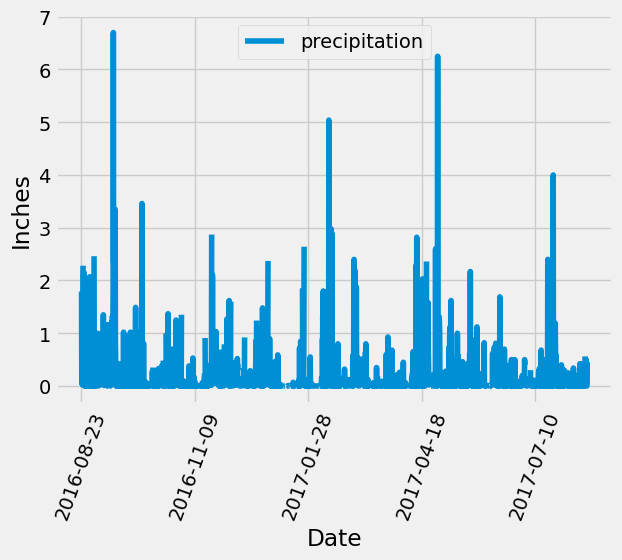

In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
date_precipitation = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(date_precipitation, columns=['date','precipitation'])

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='date').set_index('date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(rot=70, xlabel= 'Date', ylabel='Inches')


In [46]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [47]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station).count()
total_stations

9

In [48]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(measurement.station, func.count(measurement.station)). \
                group_by(measurement.station). \
                order_by(func.count(measurement.station).desc()).all()

station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [56]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_number = 'USC00519281'
session.query(func.min(measurement.tobs),
              func.max(measurement.tobs),
              func.avg(measurement.tobs)).filter(measurement.station == station_number).all()

[(54.0, 85.0, 71.66378066378067)]

<Axes: ylabel='Frequency'>

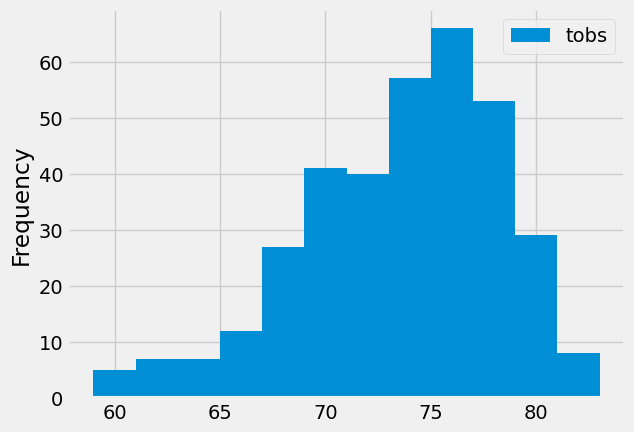

In [65]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active = station_activity[0][0]

results = session.query(measurement.tobs) \
            .filter(measurement.station == most_active) \
            .filter(measurement.date >= one_year)

# convert to dataframe
results_df = pd.DataFrame(results)
results_df.plot.hist(bins=12) 

# Close Session

In [16]:
# Close Session
session.close()